In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Dataset

In [2]:
df = pd.read_csv("Data/data_comparing/Prostate.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V6025,V6026,V6027,V6028,V6029,V6030,V6031,V6032,V6033,V6034
0,0,-0.927178,-0.740039,-0.532016,-1.097891,-0.986673,0.018752,-0.863326,3.959997,-0.398219,...,-0.029602,-1.097891,-1.097891,-0.894733,0.850270,-1.097891,-0.302063,-0.767685,-0.452616,0.194001
1,0,-0.835899,-0.835899,-0.585647,-0.835899,-0.329768,-0.835899,-0.835899,4.037788,-0.835899,...,-0.835899,-0.835899,-0.835899,-0.835899,0.038090,-0.835899,-0.835899,-0.835899,-0.835899,0.075500
2,0,0.236073,0.252645,-1.154351,-0.372372,-0.338900,1.253467,0.506325,3.868961,0.201932,...,0.860446,-1.154351,-1.154351,-0.372372,0.899781,-0.867200,0.360426,-1.154351,-1.154351,-1.154351
3,0,-0.748623,-0.439165,0.790953,-1.033876,0.241115,1.216007,0.106282,3.976272,0.081755,...,0.614026,-1.121534,-1.121534,-0.812076,1.230378,-0.355497,0.030647,-0.278810,-1.121534,-1.121534
4,0,0.101239,-0.298285,-1.121519,-0.957714,0.342258,1.182937,0.029325,4.575871,-0.196466,...,0.639511,-1.121519,-1.121519,-0.454932,0.891627,-0.593427,0.306316,-0.076496,-0.134480,-1.121519


In [3]:
selector = VarianceThreshold(threshold=0.1)
df_reduced_variance = selector.fit_transform(df)

X = df.drop('V1', axis=1)
y = df['V1']
selector = SelectKBest(score_func=f_classif, k=50)
df_reduced_kbest = selector.fit_transform(X, y)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_reduced_kbest, y.values, test_size=0.2, random_state=42)

# Build Model

In [6]:
class Logistic_Regression():
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.losses = []

    def activation(self, z):
        return np.exp(z) / (1 + np.exp(z))

    def predict_prob(self, X):
        z = np.dot(X, self.w.T)
        return self.activation(z)

    def predict(self, X):
        y_hat = self.predict_prob(X)
        y_hat = np.where(y_hat >= 0.5, 1, 0)
        return y_hat

    def loss(self, X, y):
        y_hat = self.predict_prob(X)
        l = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
        return -np.mean(l)

    def grad(self, X, y):
        y_hat = self.predict_prob(X)
        delta = y_hat - y
        dw = np.dot(X.T, delta)
        return dw.T

    def fit(self, X, y):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        self.w = np.zeros((1, X_bias.shape[1]))
        for i in range(self.epochs):
            dw = self.grad(X_bias, y)
            self.w -= self.lr * dw
            self.losses.append(self.loss(X_bias, y))

    def evaluate(self, X, y):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        y_pred = self.predict(X_bias)
        print(f'Accuracy: {accuracy_score(y, y_pred)}')
        print(f'Recall: {recall_score(y, y_pred)}')
        print(f'Precision: {precision_score(y, y_pred)}')

## Train

In [10]:
model = Logistic_Regression(lr=0.0002, epochs=1000)
model.fit(X_train, y_train.reshape(-1, 1))

Accuracy: 0.9753086419753086
Recall: 0.9545454545454546
Precision: 1.0


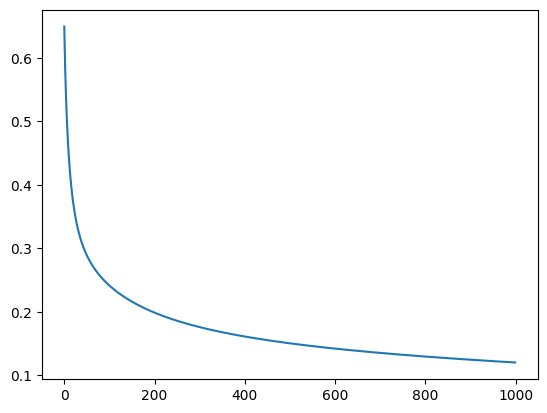

In [11]:
model.evaluate(X_train, y_train)
plt.plot(model.losses)

## Test

In [12]:
model.evaluate(X_test, y_test)

Accuracy: 0.9047619047619048
Recall: 0.875
Precision: 0.875
